<h1 align="center">Mathematical Methods In Engineering - 25872</h1>
<h4 align="center">Dr. Amiri</h4>
<h4 align="center">Sharif University of Technology, Fall 2023</h4>
<h4 align="center">Python Assignment 3</h4>
<h5 align="center"><font color="cyan"> Feel free to contact TA team for any possible questions about the assignment </font>
 </h5>
<h5 align="center"> <font color="cyan"> Questions 1,2: @mh_momeni  -  Question 2,3: @Mahdi_h721 </font> </h5>


You should write your code in the <font color='green'>Code Cell</font> and then run the <font color='green'>Evaluation Cell</font> to check the correctness of your code.<br>
<font color='red'>**Please do not edit the codes in the Evaluation Cells.**</font>

##  Q1. Implementing QR Factorization <sub><sup>``(40 pt.)``</sup></sub>

>In this question, we are going to use QR factorization in computing eigenvalues. It is an important building block in numerical linear algebra. Recall that for any matrix $A$
, $A=QR$
 where $Q$
 is orthogonal and $R$
 is upper-triangular.

 **Reminder**: The QR algorithm, uses the QR decomposition, but don't confuse the two.

In [1]:
import numpy as np
np.set_printoptions(suppress=True, precision=4)

In [2]:
n = 5
A = np.random.rand(n,n)
npQ, npR = np.linalg.qr(A)

Check that Q is orthogonal:


In [3]:
np.allclose(np.eye(n), npQ @ npQ.T), np.allclose(np.eye(n), npQ.T @ npQ)

(True, True)

Check that R is triangular

In [4]:
npR

array([[-1.1749, -1.2648, -1.0115, -0.7889, -1.1088],
       [ 0.    , -0.9432, -0.7664, -0.5687, -0.7296],
       [ 0.    ,  0.    ,  0.5092,  0.0533,  0.5402],
       [ 0.    ,  0.    ,  0.    , -0.3555,  0.3744],
       [ 0.    ,  0.    ,  0.    ,  0.    , -0.0363]])

### Gram-Schmidt

#### Classical Gram-Schmidt (unstable)

For each $j$
, calculate a single projection

$$v_j=P_ja_j$$

where $P_j$
 projects onto the space orthogonal to the span of $q_1,…,q_{j−1}$
.

In [5]:
def cgs(A):
    m, n = A.shape
    Q = np.zeros([m,n], dtype=np.float64)
    R = np.zeros([n,n], dtype=np.float64)
    
    ##Your Code start here
    for j in range(n):
        x = np.array(A[:,j])
        v = x.copy()

        for k in range(j):
            q = Q[:,k]
            v -= (q.T @ x) * q
        
        norm = np.linalg.norm(v)
        Q[:,j] = v / norm

    for i in range(m):
        for j in range(i,n):
            R[i,j] = Q[:,i].T @ A[:,j].T
    ##Your Code ends here
    return Q, R

In [6]:
Q, R = cgs(A)
np.allclose(A, Q @ R)

True

Check if Q is unitary:

In [7]:
np.allclose(np.eye(len(Q)), Q.dot(Q.T))

True

### Modified Gram-Schmidt (optional)

Classical (unstable) Gram-Schmidt: for each $j$
, calculate a single projection
$$v_j=P_ja_j$$
where $P_j$
 projects onto the space orthogonal to the span of $q_1,…,q_{j−1}$
.

Modified Gram-Schmidt: for each $j$
, calculate $j−1$
 projections
$$P_j=P_{⊥q_{j−1}⋯⊥q_2⊥q_1}$$

In [8]:
n = 3
A = np.random.rand(n,n).astype(np.float64)

In [9]:
def mgs(A):
    m, n = A.shape
    Q = np.zeros([m,n], dtype=np.float64)
    R = np.zeros([n,n], dtype=np.float64)
    ##Your Code start here
    v = A.copy()
    for j in range(n):
        R[j,j] = np.linalg.norm(v[:,j])
        Q[:,j] = v[:,j] / R[j,j]
        for k in range(j+1,n):
            q = Q[:,j]
            R[j,k] = q.T @ v[:,k]
            v[:,k] -= R[j,k] * q
    ##Your Code ends here
    return Q, R

In [10]:
Q, R = mgs(A)
np.allclose(np.eye(len(Q)), Q.dot(Q.T.conj()))

True

In [11]:
np.allclose(A, np.matmul(Q,R))

True

### Classical vs Modified Gram-Schmidt

In this part, we want to construct a square matrix $A$ with random singular vectors and widely varying singular values spaced by factors of 2 between $2^{−1}$
 and $2^{−(n+1)}$

In [12]:
import matplotlib.pyplot as plt
from matplotlib import rcParams
%matplotlib inline

In [13]:
n = 100
U, X = np.linalg.qr(np.random.randn(n,n))   # set U to a random orthogonal matrix
V, X = np.linalg.qr(np.random.randn(n,n))   # set V to a random orthogonal matrix
S = np.diag(np.power(2,np.arange(-1,-(n+1),-1), dtype=float))  # Set S to a diagonal matrix w/ exp
                                                              # values between 2^-1 and 2^-(n+1)

In [14]:
A = np.matmul(U,np.matmul(S,V))
QC, RC = cgs(A)
QM, RM = mgs(A) # if you don't complete the mgs function, comment this line

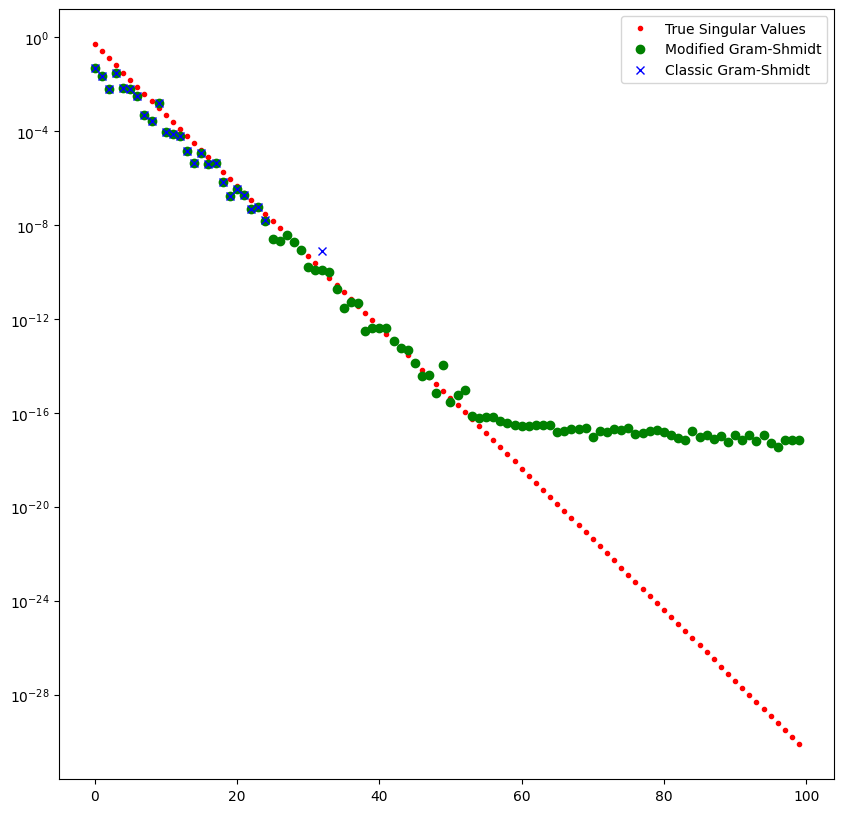

In [15]:
plt.figure(figsize=(10,10))
plt.semilogy(np.diag(S), 'r.', label="True Singular Values")
plt.semilogy(np.diag(RM), 'go', label="Modified Gram-Shmidt")
plt.semilogy(np.diag(RC), 'bx', label="Classic Gram-Shmidt")
plt.legend()
rcParams.update({'font.size': 18})

### Eigenvalue Decomposition using QR Factorization

Use the QR algorithm (or QR method) to get the eigenvalues of matrix $A$. Do 100 iterations, and print out the 1st, 5th, 10th, 20th and 100th iteration.

 **Reminder**: The QR algorithm (or QR method), uses the QR factorization, but don't confuse the two.

In [16]:
##Your Code start here
def eigvalues(A):
    A_k = A.copy()
    for i in range(1,101):
        Q_k , R_k = cgs(A_k)
        A_k = R_k @ Q_k
        if i in [1,5,10,20,100]:
            print('{} iteration : '.format(i),np.sort(np.diag(A_k)))
##Your Code ends here

In [17]:
A = np.array([1.0, -1.0, 0.0, 0.0, -1.0, 1.0, -1.0, 0.0, 0.0, -1.0, 2.0, 0.0, 0.0, 0.0, 0.0, 3.0]).reshape((4, 4))
print("The matrix: \n", A)

print("\n --- Built-in ---")
##Your Code start here
print(np.linalg.eig(A)[0],'\n')
print('--- QR algorithm ---')
eigvalues(A)
##Your Code ends here

The matrix: 
 [[ 1. -1.  0.  0.]
 [-1.  1. -1.  0.]
 [ 0. -1.  2.  0.]
 [ 0.  0.  0.  3.]]

 --- Built-in ---
[-0.247   1.445   2.8019  3.    ] 

--- QR algorithm ---
1 iteration :  [0. 2. 2. 3.]
5 iteration :  [-0.247   1.4541  2.7929  3.    ]
10 iteration :  [-0.247   1.4451  2.8019  3.    ]
20 iteration :  [-0.247   1.445   2.8019  3.    ]
100 iteration :  [-0.247   1.445   2.8019  3.    ]


##  Q2. SVD & Image processing <sub><sup>``(30 pt.)``</sup></sub>

> In this question, we are going to investigate the use of SVD as a tool to obtain the basis of the matrix in digital image processing.
The first issue we will examine is image compression. For this purpose, in general, we can consider the information inside the image as a data matrix, then find a suitable basis for this information matrix and by depicting the primary matrix on the more important basis vectors and keeping the necessary information to show the initial image with less information.
This process results in image compression. It should be noted that for simplicity, the images we are examining in this exercise are in black and white.
>With the help of SVD, we can find a basis for the column space of the image matrix that we want, so that the columns of the image matrix have the highest correlation with the basis vectors.
>On the other hand, if these bases are considered in descending order of the size of the singular values, they will contain the most general information of the columns of the image, so by keeping only r initial columns of the found bases (U) along with the combined vectors (V) and the singular values (Σ) corresponding to them, we can retain the image's overall image with a good approximation.
>From an expert point of view, the reconstruction is actually a lower-order reconstruction of the primary matrix.
In this view, the value of r is the parameter to control the amount of compression we want.

###  part 1

In this part, the compression operation is performed on the input black and white image with the help of SVD analysis. One of the criteria for comparing the initial and final image is the PSNR criterion. Research about this criterion and draw the PSNR diagram in terms of different r. Then compare the results with the diagram by giving some test inputs and plotting the outputs.
One of the inputs you give to the function should be the image pic.jpg.

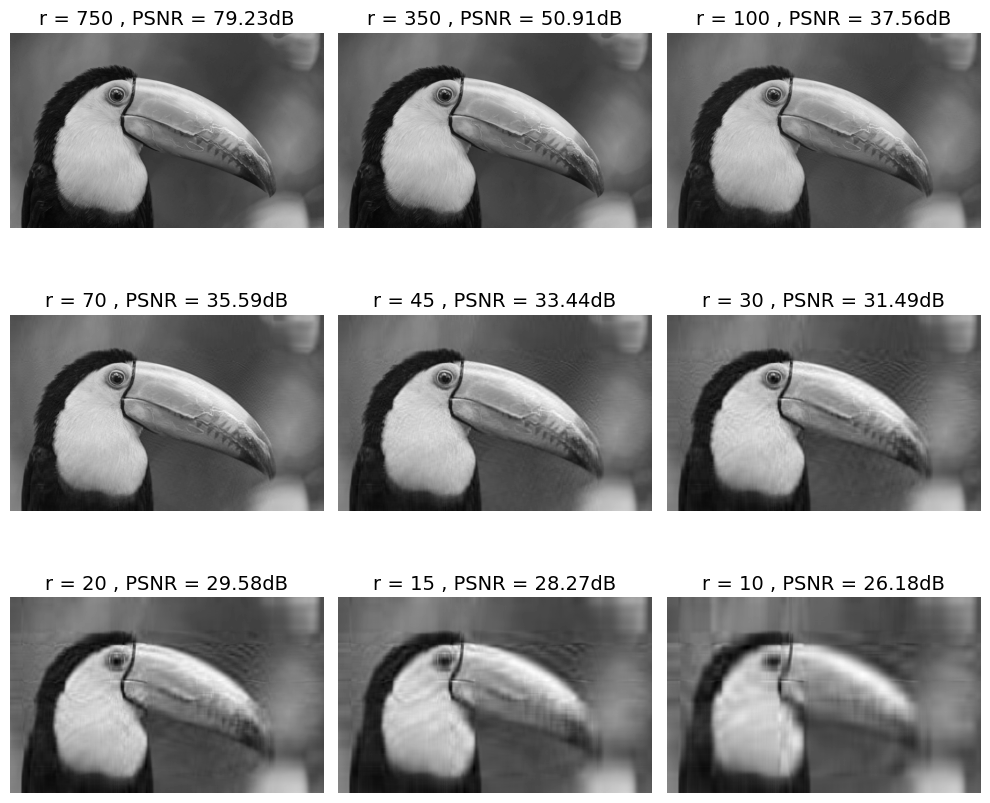

In [2]:
import cv2
import numpy as np
from matplotlib import pyplot as plt
image = np.array(cv2.imread('pic.jpg',cv2.IMREAD_GRAYSCALE))
m , n = image.shape
U, eign, V = np.linalg.svd(image)
fig = plt.figure(figsize=(10,9))
for index,r in enumerate([750,350,100,70,45,30,20,15,10]):
    sigma = np.eye(m,n) @ np.diag(np.append(eign[:r],np.array([0] * (n - r))))
    reconstruct = U @ sigma @ V
    diff = np.array(reconstruct - image,dtype=np.float64)
    PSNR =20 * np.log10(255) - 10 * np.log10(np.sum(diff ** 2) / (m * n))
    plt.subplot(331 + index)
    plt.imshow(reconstruct,cmap='gray')
    plt.title('r = {} , PSNR = {:.4}dB'.format(r,PSNR),fontsize = 14)
    plt.axis('off')
fig.tight_layout()
plt.show()

###  part 2

Another issue that we can explore with a similar idea of applying base transform is removing noise from images. In the condition that the noise in the image is uniform and in such a way that it does not distort the general information in the image. from the point of view of SVD, according to the examination of the general information, the direction of the image vector on bases with larger singular values has not changed much, and removing the information related to Examining general information to vectors with less importance can remove noise and keep the main information of the image.
In this part, add two different noises salt and pepper and Gaussian noise with a desired and appropriate range to the image pic.jpg so that the PSNR of both images is in the same range, then perform the noise reduction process with the help of SVD analysis.
For both noises, draw the PSNR diagram in terms of different r.
  Then compare the results with the graph by plotting a number of outputs.
  Which of the noises is more effective in this method?


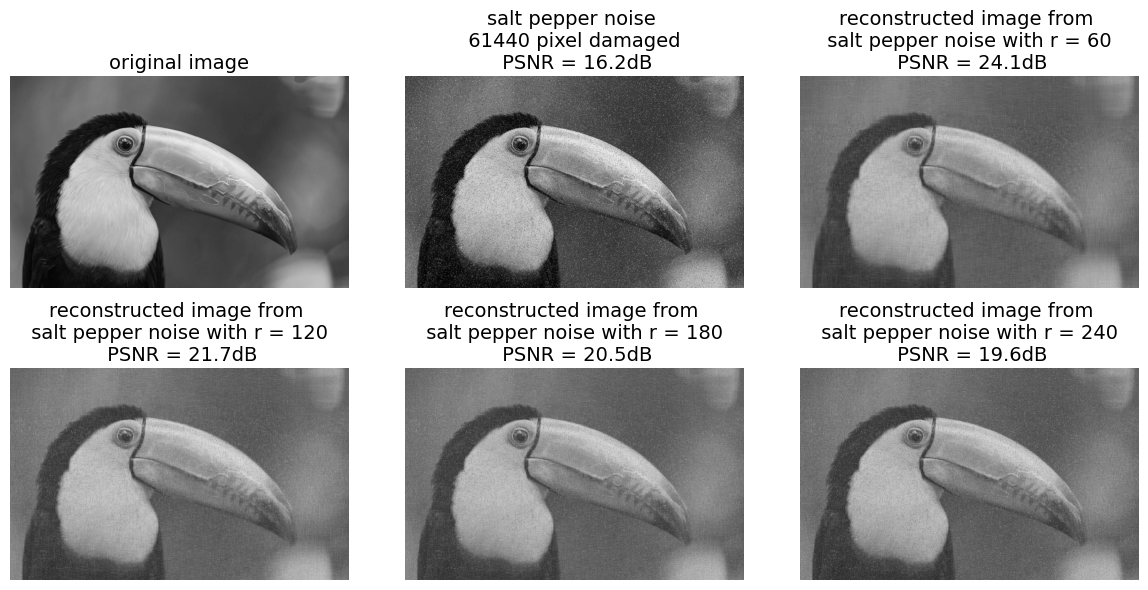

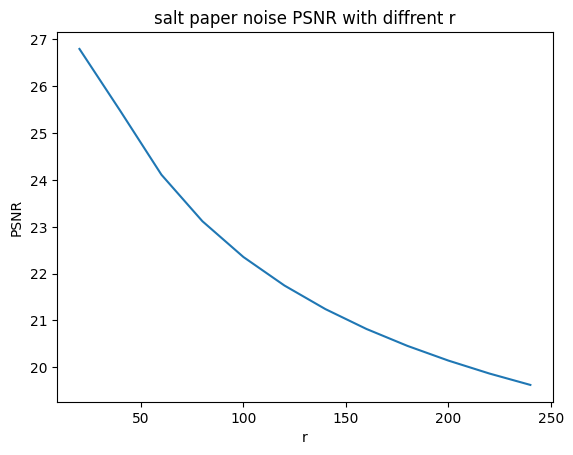

In [10]:
fig = plt.figure(figsize=(12,6))
plt.subplot(231)
plt.imshow(image,'gray')
plt.axis('off')
plt.title('original image',fontsize = 14)

salt_paper_noise_image = image.copy()
salt_paper_noise_pixel = 0.03
for i in range(int(salt_paper_noise_pixel * m * n)):
    row_random = np.random.randint(m,size=2)
    column_random = np.random.randint(n,size=2)
    salt_paper_noise_image[row_random[0],column_random[0]] , salt_paper_noise_image[row_random[1],column_random[1]] = 0,255
diff = np.array(salt_paper_noise_image - image,dtype=np.float64)
PSNR = 20 * np.log10(255) - 10 * np.log10(np.sum(diff ** 2) / (m * n))
plt.subplot(232)
plt.imshow(salt_paper_noise_image,cmap='gray')
plt.title('salt pepper noise \n {} pixel damaged \n PSNR = {:.3}dB'.format(int(salt_paper_noise_pixel * m * n * 2),PSNR),fontsize = 14)
plt.axis('off')
PSNR_list = []
r_list = [20,40,60,80,100,120,140,160,180,200,220,240]
for index,r in enumerate(r_list):
    U, eign, V = np.linalg.svd(salt_paper_noise_image)
    sigma = np.eye(m,n) @ np.diag(np.append(eign[:r],np.array([0] * (n - r))))
    salt_paper_noise_image_recons = U @ sigma @ V
    diff = np.array(salt_paper_noise_image_recons - image,dtype=np.float64)
    PSNR = 20 * np.log10(255) - 10 * np.log10(np.sum(diff ** 2) / (m * n))
    PSNR_list.append(PSNR)
    if index % 3 == 2:
        plt.subplot(2,3,index//3 + 3)
        plt.imshow(salt_paper_noise_image_recons,cmap='gray')
        plt.title('reconstructed image from \n salt pepper noise with r = {} \n PSNR = {:.3}dB'.format(r,PSNR), fontsize = 14)
        plt.axis('off')
fig.tight_layout()
plt.figure()
plt.plot(r_list,PSNR_list)
plt.title('salt paper noise PSNR with diffrent r')
plt.xlabel('r')
plt.ylabel('PSNR')
fig.tight_layout()
plt.show()

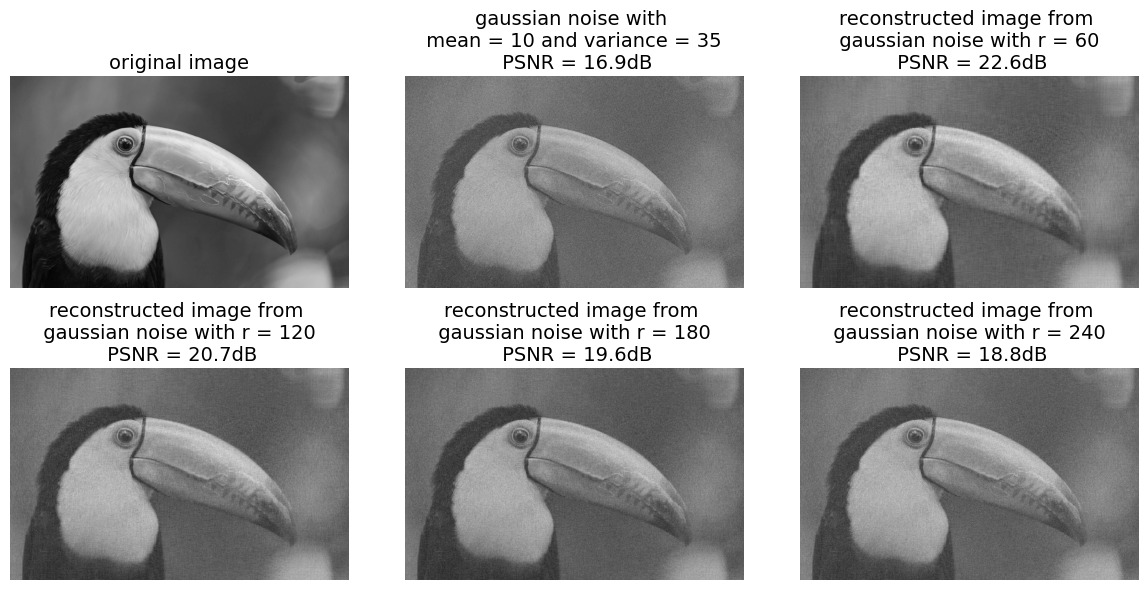

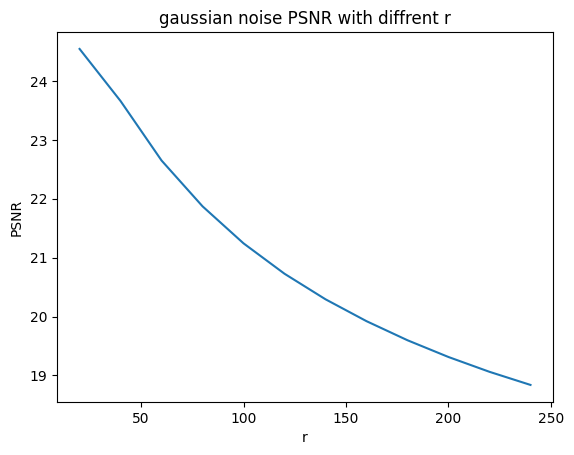

In [11]:
fig = plt.figure(figsize=(12,6))
plt.subplot(231)
plt.imshow(image,'gray')
plt.axis('off')
plt.title('original image' , fontsize = 14)

mean , var = 10 , 35
gauss_noise_image = np.random.normal(mean,var,(m,n)) + image
diff = np.array(gauss_noise_image - image,dtype=np.float64)
PSNR =20 * np.log10(255) - 10 * np.log10(np.sum(diff ** 2) / (m * n))
plt.subplot(232)
plt.imshow(gauss_noise_image,cmap='gray')
plt.title('gaussian noise with \n mean = {} and variance = {} \n PSNR = {:.3}dB'.format(mean,var,PSNR), fontsize = 14)
plt.axis('off')

PSNR_list.clear()
for index,r in enumerate(r_list):
    U, eign, V = np.linalg.svd(gauss_noise_image)
    sigma = np.eye(m,n) @ np.diag(np.append(eign[:r],np.array([0] * (n - r))))
    gauss_noise_image_recons = U @ sigma @ V
    diff = np.array(gauss_noise_image_recons - image,dtype=np.float64)
    PSNR = 20 * np.log10(255) - 10 * np.log10(np.sum(diff ** 2) / (m * n))
    PSNR_list.append(PSNR)
    if index % 3 == 2:
        plt.subplot(2,3,index//3 + 3)
        plt.imshow(gauss_noise_image_recons,cmap='gray')
        plt.title('reconstructed image from \n gaussian noise with r = {} \n PSNR = {:.3}dB'.format(r,PSNR), fontsize = 14)
        plt.axis('off')
fig.tight_layout()
plt.figure()
plt.plot(r_list,PSNR_list)
plt.title('gaussian noise PSNR with diffrent r')
plt.xlabel('r')
plt.ylabel('PSNR')
fig.tight_layout()
plt.show()

##  Q3. PCA and Clustering <sub><sup>``(40 pt.)``</sup></sub>
In this problem we want to cluster some data points.
But first, you should reduce the number of features by the PCA algorithm then use kmeans clustering algorithm

In [2]:
import pandas as pd
import numpy as np
import seaborn as sb
from tqdm import tqdm
import matplotlib.pyplot as plt
import matplotlib.cm as cm
from sklearn.cluster import KMeans, AgglomerativeClustering, DBSCAN
from yellowbrick.cluster import KElbowVisualizer
from sklearn.metrics import silhouette_score as sil, calinski_harabasz_score as chs, silhouette_samples
from sklearn.preprocessing import StandardScaler,MinMaxScaler

### Import Dataset

In [3]:
Datapoint = pd.read_csv('Datapoint.csv')

### Correlation Heatmap

In this part plot the correlation Heatmap of features.
what is your suggestion about the number of principal components that they have high variance? Explain why.

We neglect features with high correlation because they contain redundant information. Instead, we prioritize features with correlations close to zero, as they provide distinct, non-overlapping information.Based on my assumption and the correlation heatmap below, I believe that using 3 to 5 principal components can effectively cluster the data

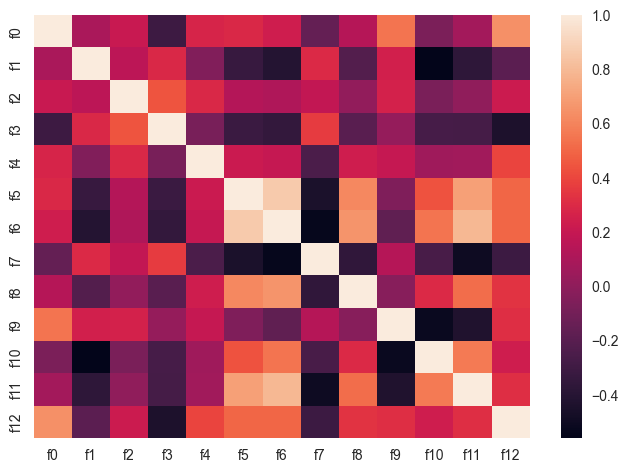

In [4]:
##Your Code start here
sb.heatmap(Datapoint.corr())
plt.show()
##Your Code ends here

###  Data Preprocessing

In [5]:
Datapoint.head()

,f0,f1,f2,f3,f4,f5,f6,f7,f8,f9,f10,f11,f12
0,14.23,1.71,2.43,15.6,127,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065
1,13.20,1.78,2.14,11.2,100,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050
2,13.16,2.36,2.67,18.6,101,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185
3,14.37,1.95,2.50,16.8,113,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480
4,13.24,2.59,2.87,21.0,118,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735


### PCA (Principal Component Analysis)
> As you know for applying PCA we should scale our data points.Here we use MinMax and Standard Scaler.
(First, use Standard Scaler)

Calculate principal components and plot Explained variance by each component.

In [6]:
##Your Code start here
Data = np.array(Datapoint.values,dtype=np.float64)
standardScaler = StandardScaler()
Data_standard = standardScaler.fit_transform(Data)
m , n = Data_standard.shape
mean = np.array([np.mean(column) for column in Data_standard.T])
var = np.array([np.var(column) for column in Data_standard.T])
print('mean of each column is 0 = ',np.allclose(mean,np.zeros(n,))) 
print('variance of each column is 1 =',np.allclose(var,np.full((n,1),1)))
##Your Code ends here

mean of each column is 0 =  True
variance of each column is 1 = True


Apply PCA Algorithm from scratch and reduce the number of features to the number you have guessed in previous parts.

In [18]:
##Your Code start here
standard_num = 5
S = (Data_standard.T @ Data_standard) / (m - 1) 
values,vectors = np.linalg.eig(S)
originalsum = sum(values)
values = values[:standard_num].copy()
pcasum = sum(values)
print("we have {:.2f}% of information with {} features".format(pcasum/originalsum * 100,standard_num))
vectors = vectors[:,:standard_num].copy()
pca_std_datapoint = Data_standard @ vectors
##Your Code ends here

we have 80.16% of information with 5 features


### PCA plot in 2D
Plot data points using their two first features.What do you think about the number of clusters?

probably 3

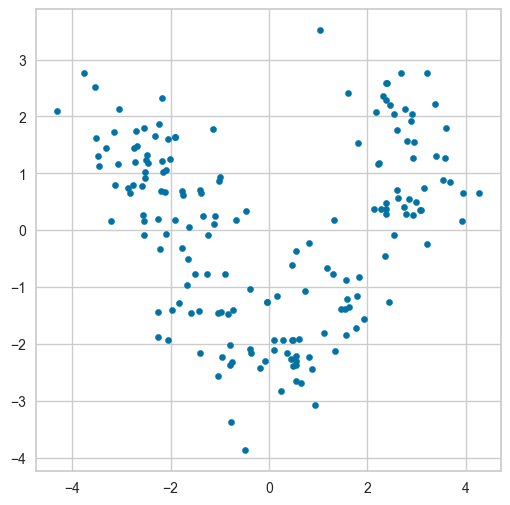

In [19]:
##Your Code start here
plt.figure(figsize=(6,6))
plt.scatter(pca_std_datapoint[:,0],pca_std_datapoint[:,1], s = 20)
plt.show()
##Your Code ends here

### Do all previous steps for MinMax Scaling
Tell your opinion about diffrences.




In [20]:
##Your Code start here
minmax_num = 3
minmaxScaler = MinMaxScaler()
Data_minmax = minmaxScaler.fit_transform(Data)
S = (Data_minmax.T @ Data_minmax) / (m - 1) 
values,vectors = np.linalg.eig(S)
originalsum = sum(values)
values = values[:minmax_num].copy()
pcasum = sum(values)
print("we have {:.2f}% of information with {} features".format(pcasum/originalsum * 100,minmax_num))
vectors = vectors[:,:minmax_num].copy()
pca_minmax_datapoints = Data_minmax @ vectors
##Your Code ends here

we have 93.68% of information with 3 features


### KMeans Clustering
#### Elbow Method for Determining Cluster Amount on  Dataset

Using the elbow method to find the optimal number of clusters

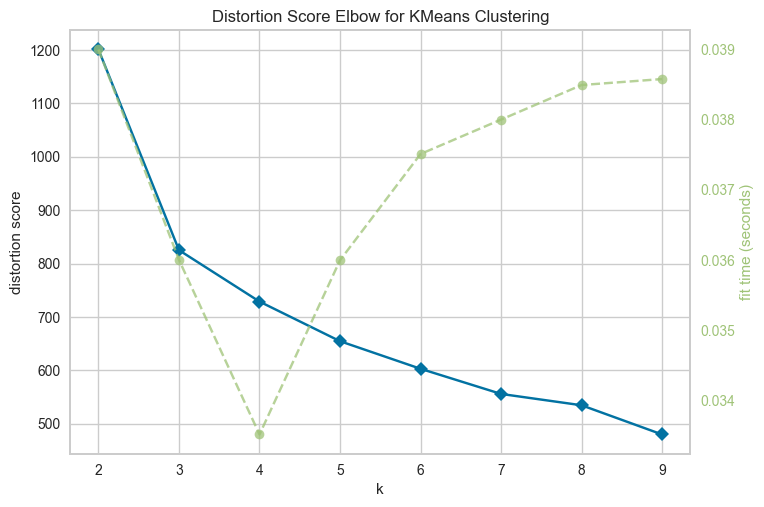

<Axes: title={'center': 'Distortion Score Elbow for KMeans Clustering'}, xlabel='k', ylabel='distortion score'>

In [22]:
##Your Code start here
model = KMeans(n_init=10)
visualizer = KElbowVisualizer(model,k=(2,10),locate_elbow = False)
visualizer.fit(pca_std_datapoint)
visualizer.show()
##Your Code ends here

What is inertia and silhouette metrics?
Explain them briefly.

Inertia measures how well a dataset was clustered by K-Means. It is calculated by measuring the distance between each data point and its centroid, squaring this distance, and summing these squares across one cluster.

The silhouette coefficient is a metric that measures how well each data point fits into its assigned cluster. It combines information about both the cohesion (how close a data point is to other points in its own cluster) and the separation (how far a data point is from points in other clusters) of the data point.
The coefficient ranges from -1 to 1, where a value close to 1 indicates a well-clustered data point, a value close to 0 suggests overlapping clusters, and a value close to -1 indicates a misclassified data point.




In [23]:
#You should save your final datapoints in pca_std_datapoint variable
inertia = []
for i in tqdm(range(2,10)):
    kmeans = KMeans(n_clusters=i, init='k-means++', n_init=15, max_iter= 500, random_state=17)
    kmeans.fit(pca_std_datapoint)
    inertia.append(kmeans.inertia_)

100%|██████████| 8/8 [00:00<00:00, 17.62it/s]


In [24]:
silhouette = {}
for i in tqdm(range(2,10)):
    kmeans = KMeans(n_clusters=i, init='k-means++', n_init=15, max_iter=500, random_state=17)
    kmeans.fit(pca_std_datapoint)
    silhouette[i] = sil(pca_std_datapoint, kmeans.labels_, metric='euclidean')

100%|██████████| 8/8 [00:00<00:00, 16.41it/s]


Plot the **inertia** and **silhouette** values

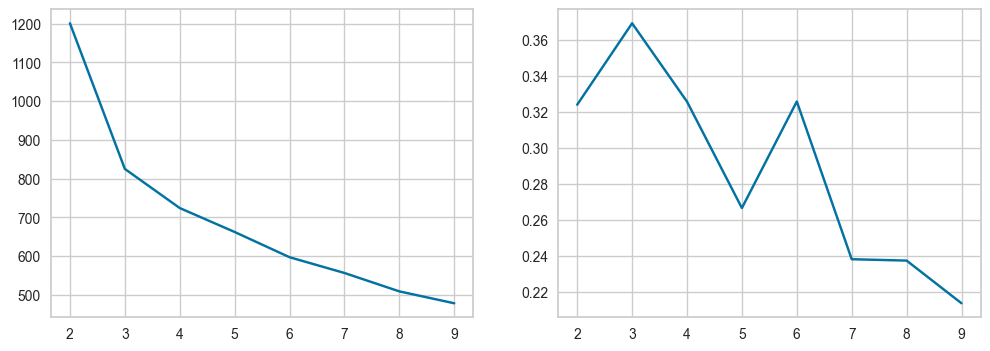

In [26]:
##Your Code start here
plt.figure(figsize=(12,4))
plt.subplot(121)
plt.plot(range(2,10),inertia)
plt.subplot(122)
plt.plot(range(2,10),silhouette.values())
plt.show()
##Your Code ends here

Tune the hyper parameters based on your conclusions.

In [27]:
model_kmeans = KMeans(n_init=10 ,n_clusters=3, random_state=0, init='k-means++')
y_predict_kmeans1 = model_kmeans.fit_predict(pca_std_datapoint)
# cluster with n = 3

#Now plot the datapoints usig two first features
(Each cluster in a different colour)

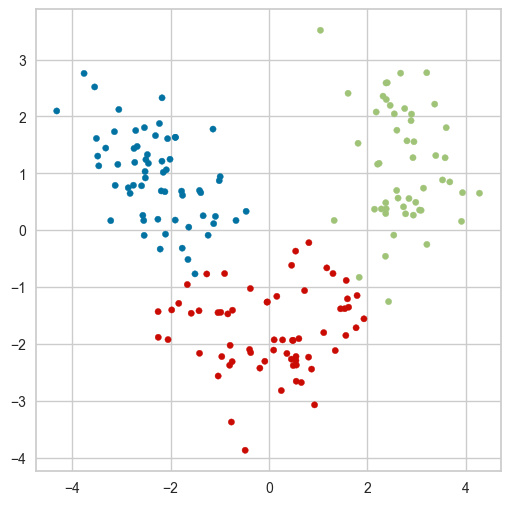

In [28]:
plt.figure(figsize=(6,6))
LABEL_COLOR_MAP = {0 : 'r',1 : 'g', 2 : 'b'}
label_color = [LABEL_COLOR_MAP[l] for l in y_predict_kmeans1]
plt.scatter(pca_std_datapoint[:,0],pca_std_datapoint[:,1],c = label_color, s = 20)
plt.show()

Do all previous steps for MinMax scaled data points.





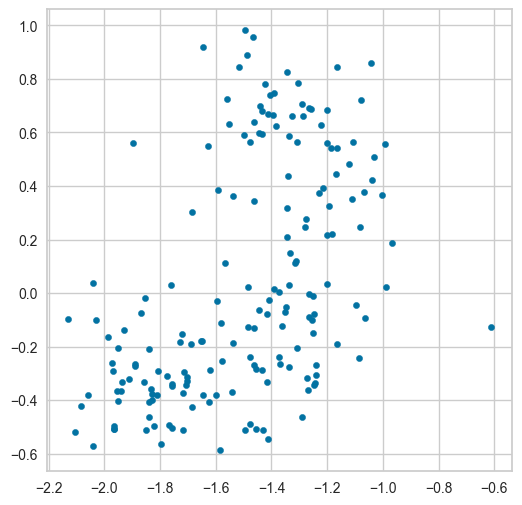

In [29]:
#Plot data points using their two first features

plt.figure(figsize=(6,6))
plt.scatter(pca_minmax_datapoints[:,0],pca_minmax_datapoints[:,1] , s=20)
plt.show()

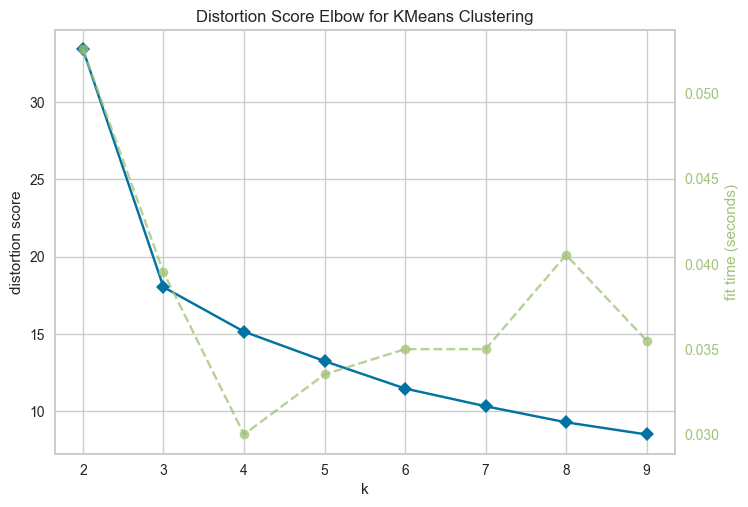

<Axes: title={'center': 'Distortion Score Elbow for KMeans Clustering'}, xlabel='k', ylabel='distortion score'>

In [32]:
model = KMeans(n_init=10)
visualizer = KElbowVisualizer(model,k=(2,10),locate_elbow = False)
visualizer.fit(pca_minmax_datapoints)
visualizer.show()

In [33]:
inertia = []
for i in tqdm(range(2,10)):
    kmeans = KMeans(n_clusters=i, init='k-means++', n_init=15, max_iter= 500, random_state=17)
    kmeans.fit(pca_minmax_datapoints)
    inertia.append(kmeans.inertia_)
    
silhouette = {}
for i in tqdm(range(2,10)):
    kmeans = KMeans(n_clusters=i, init='k-means++', n_init=15, max_iter=500, random_state=17)
    kmeans.fit(pca_minmax_datapoints)
    silhouette[i] = sil(pca_minmax_datapoints, kmeans.labels_, metric='euclidean')

100%|██████████| 8/8 [00:00<00:00, 19.22it/s]


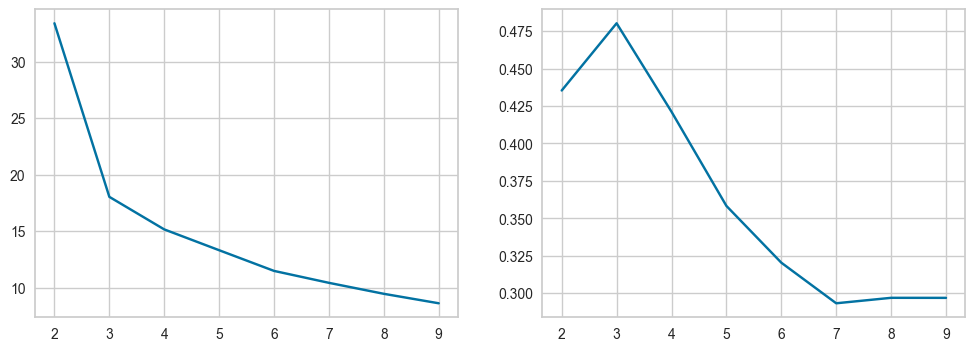

In [34]:
plt.figure(figsize=(12,4))
plt.subplot(121)
plt.plot(range(2,10),inertia)
plt.subplot(122)
plt.plot(range(2,10),silhouette.values())
plt.show()

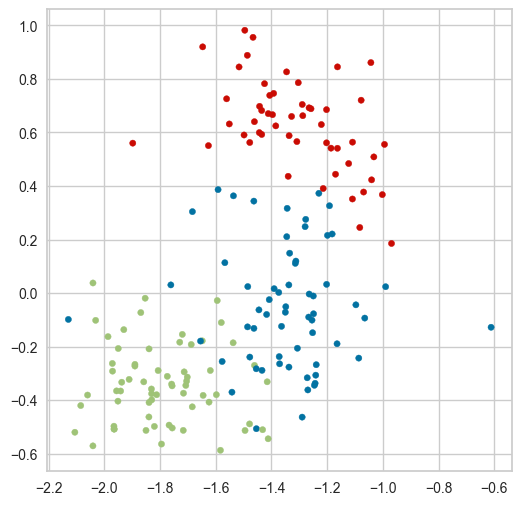

In [35]:
model_kmeans = KMeans(n_init=10 ,n_clusters=3, random_state=0, init='k-means++')
y_predict_kmeans2 = model_kmeans.fit_predict(pca_minmax_datapoints)
# cluster with n = 3
plt.figure(figsize=(6,6))
LABEL_COLOR_MAP = {0 : 'r',1 : 'g',2 : 'b'}
label_color = [LABEL_COLOR_MAP[l] for l in y_predict_kmeans2]
plt.scatter(pca_minmax_datapoints[:,0],pca_minmax_datapoints[:,1],c = label_color, s = 20)
plt.show()

Compare the results of different scaling methods in a PCA problem

In both methods, the optimal number of clusters was 3. However, with MinMax scaling, we utilized fewer features and achieved higher percentage of information compared to standard scaling. Nevertheless, based on the images, it appears that clustering was better executed with standard scaling.